In [2]:
import os
import h5py

import matplotlib.pyplot as plt
import numpy as np
import shapely
from shapely.geometry import Polygon
import xml.etree.ElementTree as ET

import shutil

import xml.etree.ElementTree as ET
from shapely.geometry import box
from shapely.ops import unary_union
import os

import os
import shutil
import random
from sklearn.model_selection import train_test_split


In [7]:
full_l4s_path = '/Users/vihaan/Workspace/!Datasets/l4s_complete'
full_cas_path = '/Users/vihaan/Workspace/!Datasets/CAS Dataset Processed'
full_ucsb_path = '/Users/vihaan/Workspace/!Datasets/ucsb_pascal/train'

In [8]:
# Helper Functions:

def add_sar_to_xml(directory_path, image_size):
    # Loop through all XML files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.xml'):
            xml_file = os.path.join(directory_path, filename)
            tree = ET.parse(xml_file)
            root = tree.getroot()

            # List to hold bounding boxes
            bounding_boxes = []

            # Extract bounding boxes from XML
            for obj in root.findall('.//object'):
                xmin = int(obj.find('bndbox/xmin').text)
                xmax = int(obj.find('bndbox/xmax').text)
                ymin = int(obj.find('bndbox/ymin').text)
                ymax = int(obj.find('bndbox/ymax').text)
                bounding_boxes.append(box(xmin, ymin, xmax, ymax))

            # Calculate the union of all bounding boxes
            if bounding_boxes:
                union_bbox = unary_union(bounding_boxes)
                total_area = union_bbox.area
            else:
                total_area = 0

            # Image area
            image_area = image_size * image_size  # Assuming a fixed image size

            # Calculate SAR
            sar = total_area / image_area

            # Create or update SAR element
            sar_element = root.find('./signal_to_area_ratio')
            if sar_element is None:
                sar_element = ET.Element('signal_to_area_ratio')
                root.append(sar_element)
            sar_element.text = f"{sar:.4f}"

            # Save the modified XML
            tree.write(xml_file)

def extract_sar_values(directory_path,image_size):
    sar_values = []
    sar_dict = {}
    # Loop through all XML files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.xml'):
            xml_file = os.path.join(directory_path, filename)
            tree = ET.parse(xml_file)
            root = tree.getroot()

            # List to hold bounding boxes
            bounding_boxes = []

            # Extract bounding boxes from XML
            for obj in root.findall('.//object'):
                xmin = int(obj.find('bndbox/xmin').text)
                xmax = int(obj.find('bndbox/xmax').text)
                ymin = int(obj.find('bndbox/ymin').text)
                ymax = int(obj.find('bndbox/ymax').text)
                bounding_boxes.append(box(xmin, ymin, xmax, ymax))

            # Calculate the union of all bounding boxes
            if bounding_boxes:
                union_bbox = unary_union(bounding_boxes)
                total_area = union_bbox.area
            else:
                total_area = 0

            # Image area
            image_area = image_size * image_size # Assuming a fixed image size

            # Calculate SAR
            sar = total_area / image_area

            #print(sar)

            # Append SAR value to list
            sar_values.append(sar)

            # Append SAR value to dictionary
            sar_dict[filename] = sar

    return sar_values, sar_dict

def add_sar_to_xml(directory_path):
    # Loop through all XML files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.xml'):
            xml_file = os.path.join(directory_path, filename)
            tree = ET.parse(xml_file)
            root = tree.getroot()

            # List to hold bounding boxes
            bounding_boxes = []

            # Extract bounding boxes from XML
            for obj in root.findall('.//object'):
                xmin = int(obj.find('bndbox/xmin').text)
                xmax = int(obj.find('bndbox/xmax').text)
                ymin = int(obj.find('bndbox/ymin').text)
                ymax = int(obj.find('bndbox/ymax').text)
                bounding_boxes.append(box(xmin, ymin, xmax, ymax))

            # Calculate the union of all bounding boxes
            if bounding_boxes:
                union_bbox = unary_union(bounding_boxes)
                total_area = union_bbox.area
            else:
                total_area = 0

            print(total_area)

            # Image area
            image_area = 224 * 224  # Assuming a fixed image size

            # Calculate SAR
            sar = total_area / image_area

            # Create or update SAR element
            sar_element = root.find('./signal_to_area_ratio')
            if sar_element is None:
                sar_element = ET.Element('signal_to_area_ratio')
                root.append(sar_element)
            sar_element.text = f"{sar:.4f}"

            # Save the modified XML
            tree.write(xml_file)

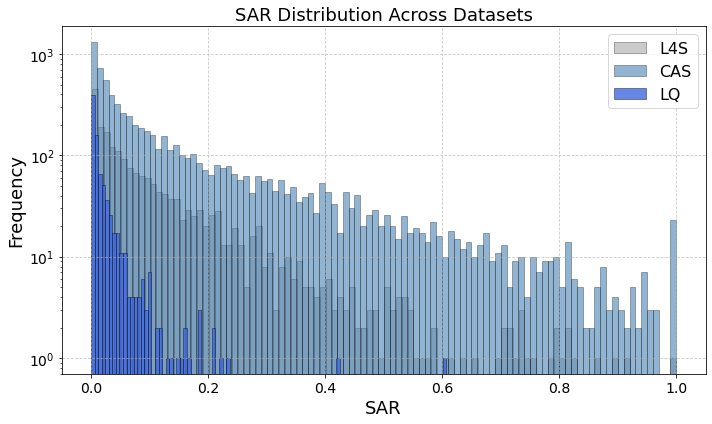

In [16]:
import matplotlib.pyplot as plt

# Function to plot SAR distribution
def plot_sar_distribution(sar_values_list, dataset_names, output_file):
    plt.figure(figsize=(10, 6))
    
    # Define slightly darker colors
    colors = ['darkgray', 'steelblue', 'royalblue']
    labels = dataset_names
    alpha_values = [0.6, 0.6, 0.8]  # Set transparency for lighter colors

    for sar_values, color, label, alpha in zip(sar_values_list, colors, labels, alpha_values):
        plt.hist(sar_values, bins=100, log=True, color=color, label=label, alpha=alpha, edgecolor='black', linewidth=0.5)

    plt.title("SAR Distribution Across Datasets", fontsize=18)
    plt.xlabel("SAR", fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.legend(loc='upper right', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()

    # Save the plot
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

# Reading the SAR values from the XML files
sar_l4s = extract_sar_values(full_l4s_path, 224)
sar_cas = extract_sar_values(full_cas_path, 512)
sar_ucsb = extract_sar_values(full_ucsb_path, 224)

# Plotting the SAR distribution for the three datasets
plot_sar_distribution([sar_l4s[0], sar_cas[0], sar_ucsb[0]], ["L4S", "CAS", "LQ"], "sar_distribution.png")


# Working with YUCHEN'S Format

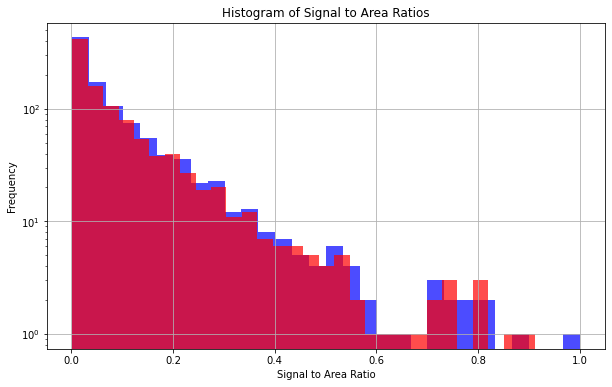

In [31]:
### Splitting L4S dataset into two sets of equal distribution (to compare effect of lower and upper)

# Reading all values:
sar_values,sar_dict = extract_sar_values(directory_path = full_l4s_path, image_size=224)

# Sorting the values
sorted_sar_values = sorted(sar_values)

# Splitting the values into two sets such that every alternate entry goes into one set or the other
sar_values_set1 = sorted_sar_values[::2]
sar_values_set2 = sorted_sar_values[1::2]

# Plotting the histograms of the two sets (x axis in log scale)
plt.figure(figsize=(10, 6))
plt.hist(sar_values_set1, bins=30, alpha=0.7, color='blue', log=True)
plt.hist(sar_values_set2, bins=30, alpha=0.7, color='red', log=True)
plt.title('Histogram of Signal to Area Ratios')
plt.xlabel('Signal to Area Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




Mean of target dataset: 0.09959105271117191
Median of target dataset: 0.05004384566326531
Mean of target dataset after modification: 0.05837576124655401
Median of target dataset after modification: 0.0322265625


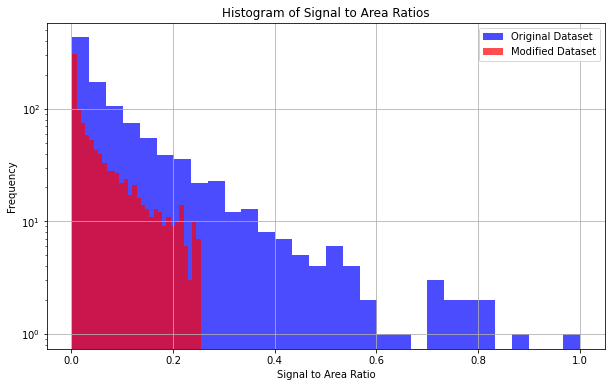

In [32]:
# Now our target dataset is going to be set 1. But we will use use a parameter r_alpha which is the amount of %images we remove from the top of set 1 and replace it with the bottom of set 2.as_integer_ratio

# Sort set 1 and set 2 in decreasing order
sar_values_set1.sort(reverse=True)
sar_values_set2.sort(reverse=True)

# Target dataset unchanged:
target_dataset = sar_values_set1.copy()

# Checking mean and median of the target dataset (in log scale)
print('Mean of target dataset:', np.mean(target_dataset))
print('Median of target dataset:', np.median(target_dataset))

import numpy as np
import matplotlib.pyplot as plt

def alpha_mod_on_sar(directory_path=full_l4s_path, image_size=224, r_alpha=0.1):
    # Reading all values:
    sar_values, sar_dict = extract_sar_values(directory_path, image_size)

    # Sorting the dictionary by values
    sorted_sar_items = sorted(sar_dict.items(), key=lambda item: item[1])

    # Splitting the values into two sets such that every alternate entry goes into one set or the other
    sar_items_set1 = sorted_sar_items[::2]
    sar_items_set2 = sorted_sar_items[1::2]

    # Sort set 1 and set 2 in decreasing order based on SAR values
    sar_items_set1.sort(key=lambda item: item[1], reverse=True)
    sar_items_set2.sort(key=lambda item: item[1], reverse=True)

    # Create the original target dataset dictionary
    target_dataset_dict = {k: v for k, v in sar_items_set1}

    # Calculate the number of images to modify
    num_images_to_modify = int(r_alpha * len(target_dataset_dict))

    # Create the modified target dataset dictionary
    target_dataset_after_dict = {k: v for k, v in sar_items_set1[num_images_to_modify:]}

    # Add the bottom r_alpha % of images from set 2
    target_dataset_after_dict.update(sar_items_set2[-num_images_to_modify:])

    return target_dataset_dict, target_dataset_after_dict

# Example usage
full_l4s_path = '/Users/vihaan/Workspace/!Datasets/l4s_complete'
target_dataset_dict, target_dataset_after_dict = alpha_mod_on_sar(directory_path=full_l4s_path)

# Convert the dictionaries to lists of values for analysis
target_dataset = list(target_dataset_dict.values())
target_dataset_after = list(target_dataset_after_dict.values())

# Checking mean and median of the target dataset after modification (in log scale)
print('Mean of target dataset after modification:', np.mean(target_dataset_after))
print('Median of target dataset after modification:', np.median(target_dataset_after))

# Visualising the histograms of the original and modified datasets
plt.figure(figsize=(10, 6))
plt.hist(target_dataset, bins=30, alpha=0.7, color='blue', log=True, label='Original Dataset')
plt.hist(target_dataset_after, bins=30, alpha=0.7, color='red', log=True, label='Modified Dataset')
plt.title('Histogram of Signal to Area Ratios')
plt.xlabel('Signal to Area Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def alpha_mod_on_sar(directory_path, image_size=224, r_alpha=0.1):
    # Reading all values:
    sar_values, sar_dict = extract_sar_values(directory_path, image_size)

    # Sorting the dictionary by values
    sorted_sar_items = sorted(sar_dict.items(), key=lambda item: item[1])

    # Splitting the values into two sets such that every alternate entry goes into one set or the other
    sar_items_set1 = sorted_sar_items[::2]
    sar_items_set2 = sorted_sar_items[1::2]

    # Sort set 1 and set 2 in decreasing order based on SAR values
    sar_items_set1.sort(key=lambda item: item[1], reverse=True)
    sar_items_set2.sort(key=lambda item: item[1], reverse=True)

    # Create the original target dataset dictionary
    target_dataset_dict = {k: v for k, v in sar_items_set1}

    # Calculate the number of images to modify
    num_images_to_modify = int(r_alpha * len(target_dataset_dict))

    # Create the modified target dataset dictionary
    target_dataset_after_dict = {k: v for k, v in sar_items_set1[num_images_to_modify:]}

    # Add the bottom r_alpha % of images from set 2
    target_dataset_after_dict.update(sar_items_set2[-num_images_to_modify:])

    return target_dataset_dict, target_dataset_after_dict

def create_dataset_from_dict(target_dataset_dict, source_image_dir, source_xml_dir, output_dir, test_size=0.2, val_size=0.1):
    # Create directories for train, test, and val sets
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    val_dir = os.path.join(output_dir, 'val')
    
    for directory in [train_dir, test_dir, val_dir]:
        os.makedirs(directory, exist_ok=True)
    
    # Convert dictionary keys to a list for splitting
    file_names = list(target_dataset_dict.keys())
    
    # Split the dataset into train, test, and validation sets
    train_files, test_files = train_test_split(file_names, test_size=test_size, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=val_size / (1 - test_size), random_state=42)
    
    # Function to copy files
    def copy_files(file_list, destination_dir):
        for file_name in file_list:
            file_name = file_name.split('.')[0]
            src_image_path = os.path.join(source_image_dir, file_name + '.jpg')
            src_xml_path = os.path.join(source_xml_dir, file_name + '.xml')
            dest_image_path = os.path.join(destination_dir, file_name + '.jpg')
            dest_xml_path = os.path.join(destination_dir, file_name + '.xml')
            if os.path.exists(src_image_path) and os.path.exists(src_xml_path):
                shutil.copy(src_image_path, dest_image_path)
                shutil.copy(src_xml_path, dest_xml_path)
    
    # Copy files to respective directories
    copy_files(train_files, train_dir)
    copy_files(test_files, test_dir)
    copy_files(val_files, val_dir)

# Main function to create datasets with different alpha values
def create_datasets_with_different_alphas(alphas, directory_path, source_image_dir, source_xml_dir, base_output_dir):
    for alpha in alphas:
        target_dataset_dict, target_dataset_after_dict = alpha_mod_on_sar(directory_path, r_alpha=alpha)
        output_dir = os.path.join(base_output_dir, f'l4s_alpha_{alpha}')
        create_dataset_from_dict(target_dataset_after_dict, source_image_dir, source_xml_dir, output_dir, test_size=0.1, val_size=0.1)

# Example usage
alphas = [0,0.05,0.1,0.15, 0.2,0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
directory_path = '/Users/vihaan/Workspace/!Datasets/l4s_complete'
source_image_dir = '/Users/vihaan/Workspace/!Datasets/l4s_complete/'
source_xml_dir = '/Users/vihaan/Workspace/!Datasets/l4s_complete/'
base_output_dir = '/Users/vihaan/Workspace/!Datasets'

create_datasets_with_different_alphas(alphas, directory_path, source_image_dir, source_xml_dir, base_output_dir)


TypeError: extract_sar_values() takes 1 positional argument but 2 were given

/Users/vihaan/miniforge3/envs/geek/lib/python3.9/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


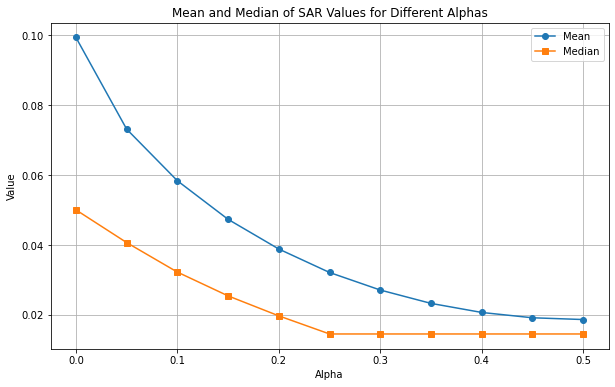

In [35]:
## Printing plot for different alphas:

def plot_mean_median_for_alphas(alphas, directory_path):
    means = []
    medians = []
    
    for alpha in alphas:
        _, target_dataset_after_dict = alpha_mod_on_sar(directory_path, r_alpha=alpha)
        target_dataset_after = list(target_dataset_after_dict.values())
        
        mean_val = np.mean(target_dataset_after)
        median_val = np.median(target_dataset_after)
        
        means.append(mean_val)
        medians.append(median_val)
    
    # Plotting mean and median
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, means, marker='o', label='Mean')
    plt.plot(alphas, medians, marker='s', label='Median')
    plt.xlabel('Alpha')
    plt.ylabel('Value')
    plt.title('Mean and Median of SAR Values for Different Alphas')
    plt.legend()
    plt.grid(True)
    plt.show()

    return means, medians

# Example usage
alphas = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
directory_path = '/Users/vihaan/Workspace/!Datasets/l4s_complete'

means, medians = plot_mean_median_for_alphas(alphas, directory_path)

print(means)
print(medians)

In [21]:
# Sorting the dictionary by landslide ratio

import xml.etree.ElementTree as ET
from shapely.geometry import box
from shapely.ops import unary_union
import os


def extract_sar_values(directory_path,image_size):
    sar_values = []
    sar_dict = {}
    # Loop through all XML files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.xml'):
            xml_file = os.path.join(directory_path, filename)
            tree = ET.parse(xml_file)
            root = tree.getroot()

            # List to hold bounding boxes
            bounding_boxes = []

            # Extract bounding boxes from XML
            for obj in root.findall('.//object'):
                xmin = int(obj.find('bndbox/xmin').text)
                xmax = int(obj.find('bndbox/xmax').text)
                ymin = int(obj.find('bndbox/ymin').text)
                ymax = int(obj.find('bndbox/ymax').text)
                bounding_boxes.append(box(xmin, ymin, xmax, ymax))

            # Calculate the union of all bounding boxes
            if bounding_boxes:
                union_bbox = unary_union(bounding_boxes)
                total_area = union_bbox.area
            else:
                total_area = 0

            # Image area
            image_area = image_size * image_size # Assuming a fixed image size

            # Calculate SAR
            sar = total_area / image_area

            #print(sar)

            # Append SAR value to list
            sar_values.append(sar)

            # Append SAR value to dictionary
            sar_dict[filename] = sar

    return sar_values, sar_dict


def divide_into_bins(sar_data, num_bins):
    bin_size = len(sar_data) // num_bins
    leftovers = len(sar_data) % num_bins

    bins = [sar_data[i * bin_size:(i + 1) * bin_size] for i in range(num_bins)]
    
    # Distribute leftovers one by one to the first 'leftovers' bins
    for i in range(leftovers):
        bins[i].append(sar_data[num_bins * bin_size + i])

    return bins

def create_dirs_and_split_data(bins, base_path, train_ratio=0.7, test_ratio=0.15):
    for i, bin in enumerate(bins):
        mean_sar = np.mean([value[1] for value in bin])
        dir_name = f"l4s_sar_{mean_sar:.4f}"
        dir_path = os.path.join(base_path, dir_name)
        
        # Create directory structure
        os.makedirs(os.path.join(dir_path, 'train'), exist_ok=True)
        os.makedirs(os.path.join(dir_path, 'test'), exist_ok=True)
        os.makedirs(os.path.join(dir_path, 'val'), exist_ok=True)
        
        # Shuffle the data before splitting
        np.random.shuffle(bin)
        
        # Calculate split indices
        n_total = len(bin)
        n_train = int(n_total * train_ratio)
        n_test = int(n_total * test_ratio)
        
        # Split data
        train_data = bin[:n_train]
        test_data = bin[n_train:n_train + n_test]
        val_data = bin[n_train + n_test:]
        
        # Copy files to respective directories
        for data, folder in [(train_data, 'train'), (test_data, 'test'), (val_data, 'val')]:
            for filename, _ in data:
                # Path for image file
                src_img = os.path.join(base_path, filename.replace('.xml', '.jpg'))  # Assuming JPG images
                dst_img = os.path.join(dir_path, folder, filename.replace('.xml', '.jpg'))
                shutil.copy2(src_img, dst_img)

                # Path for XML file
                src_xml = os.path.join(base_path, filename)
                dst_xml = os.path.join(dir_path, folder, filename)
                shutil.copy2(src_xml, dst_xml)


sar_data = extract_sar_and_filenames(directory_path = full_l4s_path)
sar_data.sort(key=lambda x: x[1])  # Sort by SAR values

num_bins = 5
bins = divide_into_bins(sar_data, num_bins)

for i, bin in enumerate(bins):
    mean_sar = np.mean([value[1] for value in bin])
    print(f"Bin {i+1}: Mean SAR = {mean_sar:.4f}, Number of Images = {len(bin)}")
    
create_dirs_and_split_data(bins, full_l4s_path)







Bin 1: Mean SAR = 0.0081, Number of Images = 412
Bin 2: Mean SAR = 0.0226, Number of Images = 412
Bin 3: Mean SAR = 0.0507, Number of Images = 411
Bin 4: Mean SAR = 0.1103, Number of Images = 411
Bin 5: Mean SAR = 0.3058, Number of Images = 411


# Comparing all dataset signal area ratios


In [ ]:
cas_sar = extract_sar_values(directory_path = full_cas_path, image_size=512)
ucsb_sar = extract_sar_values(directory_path = full_ucsb_path, image_size=224)
l4s_sar = extract_sar_values(directory_path = full_l4s_path, image_size=224)

# print the mean and median of the CAS dataset
print('Number of images in CAS dataset:', len(cas_sar))
print('Mean of CAS dataset:', np.mean(cas_sar))
print('Median of CAS dataset:', np.median(cas_sar))
print('............................................')

# print the mean and median of the UCSB dataset
print('Number of images in UCSB dataset:', len(ucsb_sar))
print('Mean of UCSB dataset:', np.mean(ucsb_sar))
print('Median of UCSB dataset:', np.median(ucsb_sar))
print('............................................')

# print the mean and median of the L4S dataset
print('Number of images in L4S dataset:', len(l4s_sar))
print('Mean of L4S dataset:', np.mean(l4s_sar))
print('Median of L4S dataset:', np.median(l4s_sar))
print('............................................')

# print the histogram of the CAS dataset
plt.figure(figsize=(10, 6))
plt.hist(cas_sar, bins=30, alpha=0.7, color='blue', log=True)
plt.title('Histogram of Signal to Area Ratios (CAS Dataset)')
plt.xlabel('Signal to Area Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# print the histogram of the UCSB dataset
plt.figure(figsize=(10, 6))
plt.hist(ucsb_sar, bins=30, range=(0.0, 1.0), alpha=0.7, color='blue', log=True)
plt.title('Histogram of Signal to Area Ratios (UCSB Dataset)')
plt.xlabel('Signal to Area Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# print the histogram of the L4S dataset
plt.figure(figsize=(10, 6))
plt.hist(l4s_sar, bins=30, alpha=0.7, color='blue', log=True)
plt.title('Histogram of Signal to Area Ratios (L4S Dataset)')
plt.xlabel('Signal to Area Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


TypeError: extract_sar_values() got an unexpected keyword argument 'image_size'

# Preparing SAR ratio splits in CAS dataset

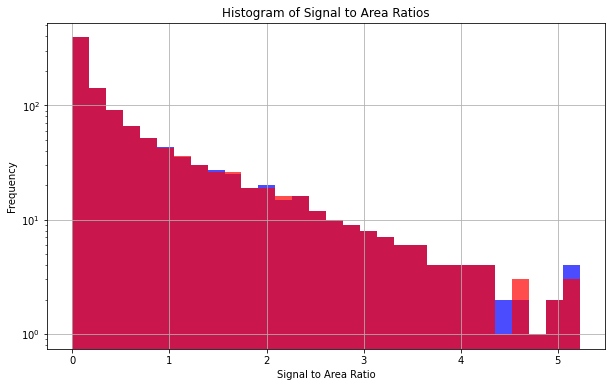

In [41]:
### Splitting CAS dataset into seven sets of equal distribution (to compare effect of lower and upper)

# Reading all values:
sar_values,sar_dict = extract_sar_values(directory_path = full_cas_path, image_size=224)

# Sorting the values
sorted_sar_values = sorted(sar_values)

# Splitting the values into seven sets such that every alternate entry goes into one set (of the seven)
sar_values_set1 = sorted_sar_values[::7]
sar_values_set2 = sorted_sar_values[1::7]
sar_values_set3 = sorted_sar_values[2::7]
sar_values_set4 = sorted_sar_values[3::7]
sar_values_set5 = sorted_sar_values[4::7]
sar_values_set6 = sorted_sar_values[5::7]
sar_values_set7 = sorted_sar_values[6::7]

# Plotting the histograms of the seven sets (x axis in log scale)
plt.figure(figsize=(10, 6))
plt.hist(sar_values_set1, bins=30, alpha=0.7, color='blue', log=True)
plt.hist(sar_values_set2, bins=30, alpha=0.7, color='red', log=True)
#plt.hist(sar_values_set3, bins=30, alpha=0.7, color='green', log=True)
#plt.hist(sar_values_set4, bins=30, alpha=0.7, color='purple', log=True)
#plt.hist(sar_values_set5, bins=30, alpha=0.7, color='orange', log=True)
#plt.hist(sar_values_set6, bins=30, alpha=0.7, color='black', log=True)
#plt.hist(sar_values_set7, bins=30, alpha=0.7, color='yellow', log=True)
plt.title('Histogram of Signal to Area Ratios')
plt.xlabel('Signal to Area Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [2]:
# Using only sets one and two, we will create a target dataset. We will use a parameter r_alpha which is the amount of %images we remove from the top of set 1 and replace it with the bottom of set 2.
import os
import shutil
from sklearn.model_selection import train_test_split

def alpha_mod_on_sar(directory_path, num_bins = 2,image_size=224, r_alpha=0.1):
    # Reading all values:
    sar_values, sar_dict = extract_sar_values(directory_path, image_size)

    # Sorting the dictionary by values
    sorted_sar_items = sorted(sar_dict.items(), key=lambda item: item[1])

    # Splitting the values into num_bin sets such that every alternate entry goes into one set or the other
    sar_items_set1 = sorted_sar_items[::num_bins]
    sar_items_set2 = sorted_sar_items[1::num_bins]

    # Sort set 1 and set 2 in decreasing order based on SAR values
    sar_items_set1.sort(key=lambda item: item[1], reverse=True)
    sar_items_set2.sort(key=lambda item: item[1], reverse=True)

    # Create the original target dataset dictionary
    target_dataset_dict = {k: v for k, v in sar_items_set1}

    # Calculate the number of images to modify
    num_images_to_modify = int(r_alpha * len(target_dataset_dict))

    # Create the modified target dataset dictionary
    target_dataset_after_dict = {k: v for k, v in sar_items_set1[num_images_to_modify:]}

    # Add the bottom r_alpha % of images from set 2
    target_dataset_after_dict.update(sar_items_set2[-num_images_to_modify:])

    return target_dataset_dict, target_dataset_after_dict

def create_dataset_from_dict(target_dataset_dict, source_image_dir, source_xml_dir, output_dir, test_size=0.2, val_size=0.1):
    # Create directories for train, test, and val sets
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    val_dir = os.path.join(output_dir, 'val')
    
    for directory in [train_dir, test_dir, val_dir]:
        os.makedirs(directory, exist_ok=True)
    
    # Convert dictionary keys to a list for splitting
    file_names = list(target_dataset_dict.keys())
    
    # Split the dataset into train, test, and validation sets
    train_files, test_files = train_test_split(file_names, test_size=test_size, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=val_size / (1 - test_size), random_state=42)
    
    # Function to copy files
    def copy_files(file_list, destination_dir):
        for file_name in file_list:
            file_name = file_name.split('.')[0]
            src_image_path = os.path.join(source_image_dir, file_name + '.jpg')
            src_xml_path = os.path.join(source_xml_dir, file_name + '.xml')
            dest_image_path = os.path.join(destination_dir, file_name + '.jpg')
            dest_xml_path = os.path.join(destination_dir, file_name + '.xml')
            if os.path.exists(src_image_path) and os.path.exists(src_xml_path):
                shutil.copy(src_image_path, dest_image_path)
                shutil.copy(src_xml_path, dest_xml_path)
    
    # Copy files to respective directories
    copy_files(train_files, train_dir)
    copy_files(test_files, test_dir)
    copy_files(val_files, val_dir)

# Main function to create datasets with different alpha values
def create_datasets_with_different_alphas(alphas, directory_path, num_bins, image_size, source_image_dir, source_xml_dir, base_output_dir):
    for alpha in alphas:
        target_dataset_dict, target_dataset_after_dict = alpha_mod_on_sar(directory_path, num_bins,image_size= image_size, r_alpha=alpha)
        output_dir = os.path.join(base_output_dir, f'cas_alpha_{alpha}')
        create_dataset_from_dict(target_dataset_after_dict, source_image_dir, source_xml_dir, output_dir, test_size=0.1, val_size=0.1)

# Example usage
alphas = [0.1,0.2,0.3,0.4,0.5]
directory_path = '/Users/vihaan/Workspace/!Datasets/CAS Dataset Processed'
source_image_dir = '/Users/vihaan/Workspace/!Datasets/CAS Dataset Processed/'
source_xml_dir = '/Users/vihaan/Workspace/!Datasets/CAS Dataset Processed/'
base_output_dir = '/Users/vihaan/Workspace/!Datasets'
image_size = 512
num_bins = 7

create_datasets_with_different_alphas(alphas, directory_path, num_bins, image_size, source_image_dir, source_xml_dir, base_output_dir)

In [3]:
def plot_mean_median_for_alphas(alphas, image_size, directory_path):
    means = []
    medians = []
    
    for alpha in alphas:
        _, target_dataset_after_dict = alpha_mod_on_sar(directory_path, image_size= image_size, r_alpha=alpha)
        target_dataset_after = list(target_dataset_after_dict.values())
        
        mean_val = np.mean(target_dataset_after)
        median_val = np.median(target_dataset_after)
        
        means.append(mean_val)
        medians.append(median_val)
    
    # Plotting mean and median
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, means, marker='o', label='Mean')
    plt.plot(alphas, medians, marker='s', label='Median')
    plt.xlabel('Alpha')
    plt.ylabel('Value')
    plt.title('Mean and Median of SAR Values for Different Alphas')
    plt.legend()
    plt.grid(True)
    plt.show()

    return means, medians

# Example usage
alphas = [0.1,0.2,0.3,0.4,0.5]
directory_path = '/Users/vihaan/Workspace/!Datasets/CAS Dataset Processed'
image_size = 512

means, medians = plot_mean_median_for_alphas(alphas, image_size, directory_path)

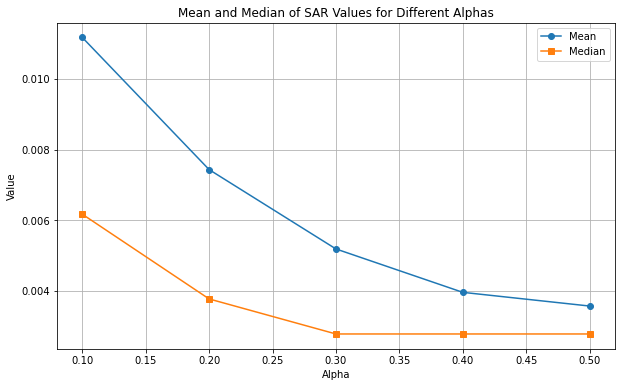

[0.01117348555109823, 0.0074314973792251274, 0.005184696297603863, 0.003956115396423637, 0.0035681098960231414]
[0.006168365478515625, 0.0037689208984375, 0.002777099609375, 0.002777099609375, 0.002777099609375]


In [9]:
## Printing plot for different alphas:

def plot_mean_median_for_alphas(alphas, image_size, directory_path):
    means = []
    medians = []
    
    for alpha in alphas:
        _, target_dataset_after_dict = alpha_mod_on_sar(directory_path, image_size= image_size, r_alpha=alpha)
        target_dataset_after = list(target_dataset_after_dict.values())
        
        mean_val = np.mean(target_dataset_after)
        median_val = np.median(target_dataset_after)
        
        means.append(mean_val)
        medians.append(median_val)
    
    # Plotting mean and median
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, means, marker='o', label='Mean')
    plt.plot(alphas, medians, marker='s', label='Median')
    plt.xlabel('Alpha')
    plt.ylabel('Value')
    plt.title('Mean and Median of SAR Values for Different Alphas')
    plt.legend()
    plt.grid(True)
    plt.show()

    return means, medians

# Example usage
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
directory_path = '/Users/vihaan/Workspace/!Datasets/l4s_complete'
image_size = 512

means, medians = plot_mean_median_for_alphas(alphas, image_size, directory_path)
print(means)
print(medians)